test data
gain before filtered 0.9983733916970811
gain after filtered 1.0535832317481133
num stocks 486 / 1768
backtest data
gain before filtered 1.003997768117934
gain after filtered 1.031806842632945
num stocks 3311 / 12446


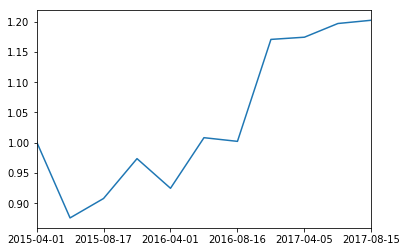

In [12]:
import pandas as pd
data = pd.read_csv('data.csv', index_col='Unnamed: 0')

from sklearn.model_selection import train_test_split
# clear data 將爛資料去掉
data.dropna(how='any', inplace=True)
# 選擇2015年以後的資料作為回測用
dbacktest = data[data['buy_date'] > '2015']
# 將其於的資料再分成兩類：dtrain 跟 dtest
dataTrainTest = data[data['sell_date'] < '2015']
dtrain, dtest = train_test_split(dataTrainTest, test_size=0.10, random_state=42)
# 設定我們的feature要用哪些
features = data.columns[5:-1]

from sklearn.ensemble import RandomForestClassifier
# 創建機器學習的model
rf = RandomForestClassifier(n_estimators=10, criterion='gini', 
                            max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, 
                            bootstrap=True, oob_score=False, n_jobs=1, 
                            random_state=None, verbose=0, warm_start=False, 
                            class_weight=None)
# 分類能獲利的股票
rf.fit(dtrain[features], dtrain['獲利'] > 1)

result = rf.predict(dtest[features])
print('test data')
print('gain before filtered', dtest['獲利'].mean())
print('gain after filtered', dtest['獲利'][result].mean())
print('num stocks', sum(result), '/', len(dtest))
result = rf.predict(dbacktest[features])
print('backtest data')
print('gain before filtered', dbacktest['獲利'].mean())
print('gain after filtered', dbacktest['獲利'][result].mean())
print('num stocks', sum(result), '/', len(dbacktest))

%matplotlib inline
dbacktest['預測'] = pd.Series(result, index=dbacktest.index)
dates = list(set(dbacktest['buy_date']))
dates.sort()

history = []
for d in dates:
    history.append(dbacktest[(dbacktest['buy_date'] == d) & (dbacktest['預測'])]['獲利'].mean())

pd.Series(history, index=dates).cumprod().plot()